# Lab 5 -  MA and AR model correlations

Firstly I created a function to generate AR model. I included "burnin" parameter that determines how much of data should be ignored to train model properly

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


def generate_ar_model(c, phi_values, epsilon_values, burnin):
    """
    plot to generate ar_model y values
    """
    ar_values = [0]*len(phi_values)  # fill with zeroes to not make it go out of index?
    for t in range(len(phi_values), len(epsilon_values)):
        ar_value = c + epsilon_values[t] + sum(phi_values[i]*ar_values[t-i-1] for i in range(len(phi_values)))
        ar_values.append(ar_value)
    return ar_values[burnin:]

### AR(1) model

Then I created sample of 5 000 random values, right away generated AR solution for that. Below I present graphs of both.

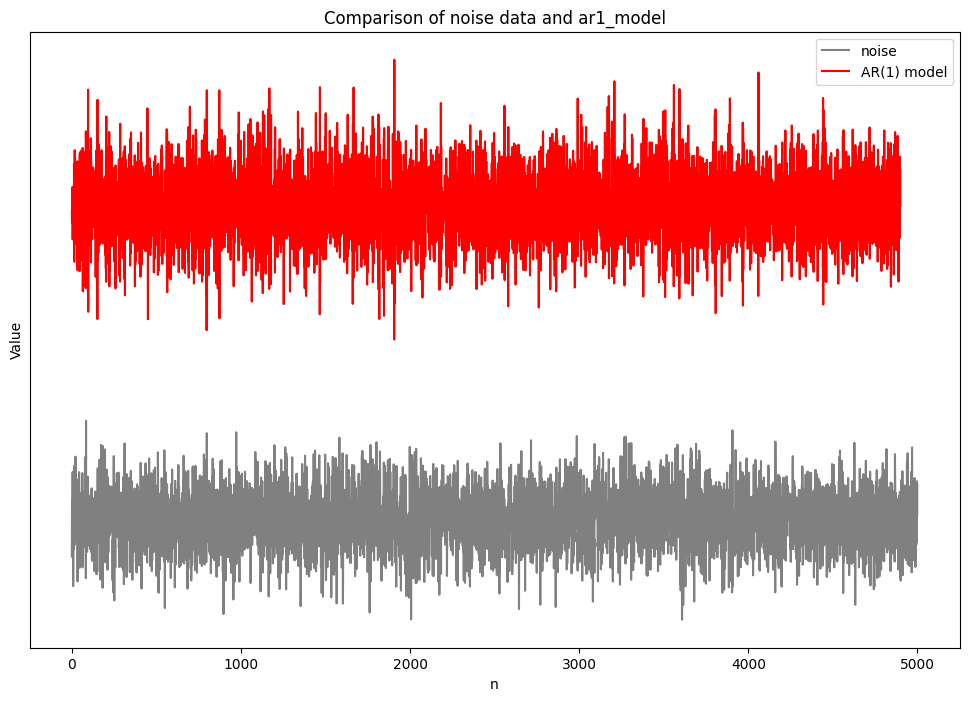

In [2]:
random_values_5k = np.random.normal(0, 1, 5000)
ar_model_1 = generate_ar_model(18, [-0.6], random_values_5k, 100)
plt.figure(figsize=(12,8))
plt.plot(random_values_5k, color='gray', label='noise')
plt.plot(ar_model_1, color='red', label='AR(1) model')
plt.title('Comparison of noise data and ar1_model')
plt.xlabel('n')
plt.ylabel('Value')
plt.yticks([])
plt.legend()
plt.show()


Then I checked autocorellation graphs for AR 1 model

Text(0.5, 0.98, 'Autocorrelation for AR(1) Model')

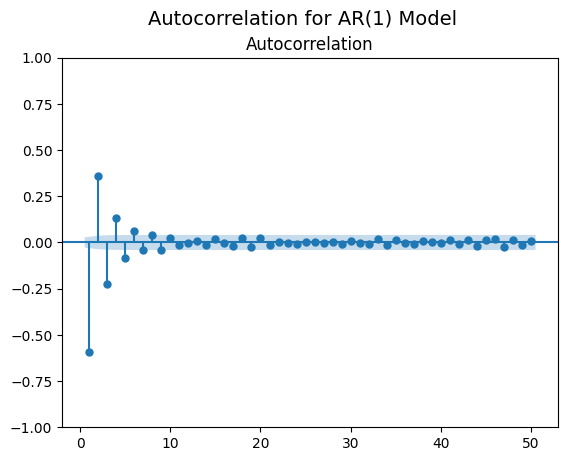

In [3]:
fig_acf_ar_1 = plot_acf(ar_model_1, lags=50, zero=False)
fig_acf_ar_1.suptitle('Autocorrelation for AR(1) Model', fontsize=14)


The gradual decline of the autocorrelation index suggests that as the lag increases, the correlation between the current value and the value at the lag decreases. This is a characteristic of an autoregressive model. Now I will move on to **partial autocorrelation** .

Text(0.5, 0.98, 'Partial Autocorrelation for AR(1) Model')

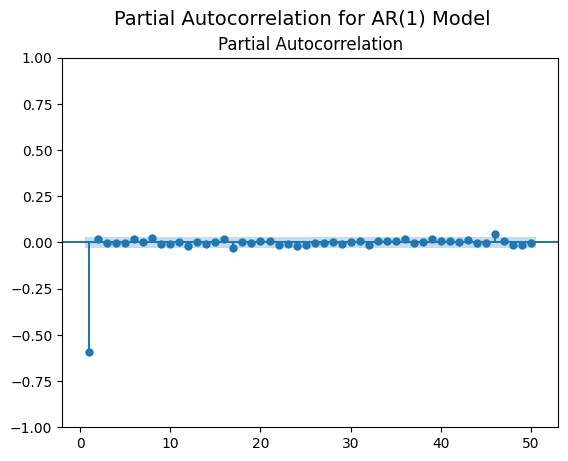

In [4]:
fig_pacf_ar_1 = plot_pacf(ar_model_1, lags=50, zero=False)
fig_pacf_ar_1.suptitle('Partial Autocorrelation for AR(1) Model', fontsize=14)


Spike in first value is expected because "The partial autocorrelation for an AR(p) model is nonzero for lags less than or equal to p and 0 for lags greater than p". Now I will check **adfuller statics and p-value** for that model.

In [5]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(ar_model_1)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -138.0598620872693
p-value: 0.0


I can deny null hypothesis based on p-value < 0.05 . With this result and previous autocorrelation graphs I'm assured that AR(1) model is stationary.

### AR(2), AR(3) ,AR(4) models

Then to compare different phi values I used my simple pipeline to generate results. I will analyze each model individially

In [6]:
list_of_ar_models = []

for index,phi in enumerate([-0.7, -0.8, -0.9]):
    ar_values = generate_ar_model(18, [phi], random_values_5k, 100)
    list_of_ar_models.append(ar_values)
ar_model_4 = list_of_ar_models.pop()
ar_model_3 = list_of_ar_models.pop()
ar_model_2 = list_of_ar_models.pop()

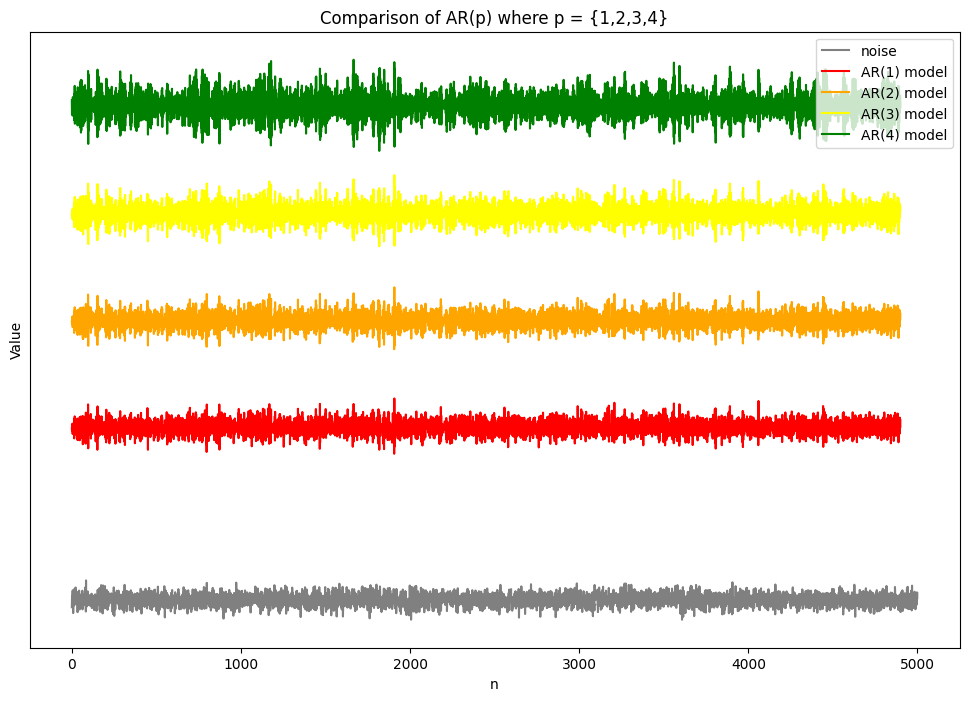

In [7]:
offset = 20
plt.figure(figsize=(12,8))
plt.plot(random_values_5k, color='gray', label='noise')
plt.plot([i + offset for i in ar_model_1], color='red', label='AR(1) model')
plt.plot([i + 2*offset for i in ar_model_2], color='orange', label='AR(2) model')
plt.plot([i + 3*offset for i in ar_model_3], color='yellow', label='AR(3) model')
plt.plot([i + 4*offset for i in ar_model_4], color='green', label='AR(4) model')
plt.title('Comparison of AR(p) where p = {1,2,3,4}')
plt.xlabel('n')
plt.ylabel('Value')
plt.yticks([])
plt.legend()
plt.show()

An interesing observation. The lower the phi value (in AR(4) phi = -0.9) the more amplified are values in the plots. Now I will analyze **autocorrelation** of the models.

Text(0.5, 0.98, 'Autocorrelation for AR(4) Model')

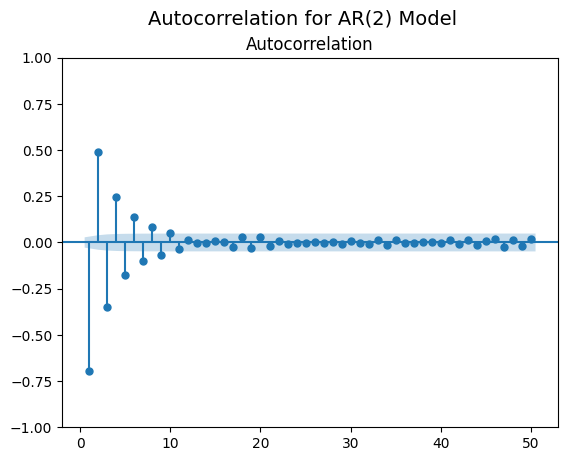

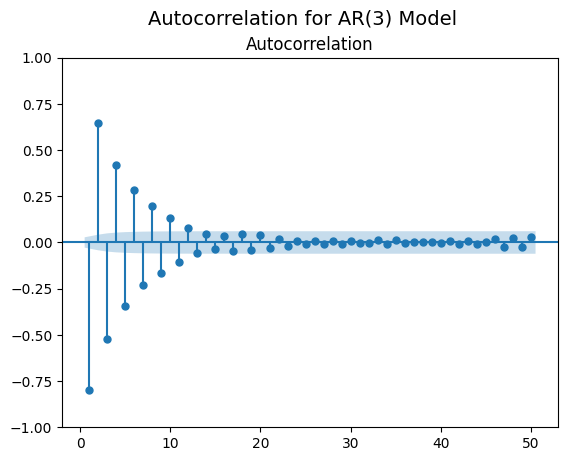

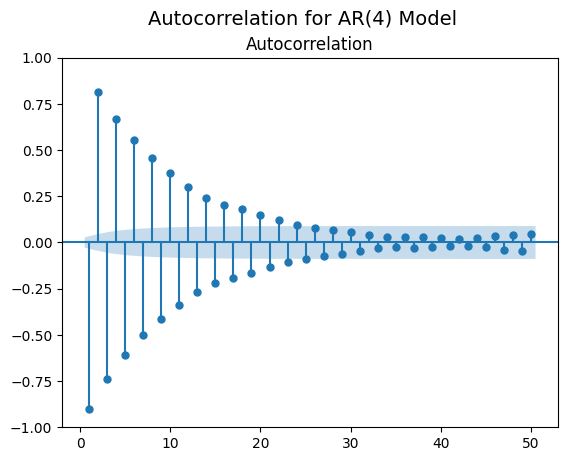

In [8]:
fig_acf_2 = plot_acf(ar_model_2, lags=50, zero=False)
fig_acf_2.suptitle('Autocorrelation for AR(2) Model', fontsize=14)

fig_acf_3 = plot_acf(ar_model_3, lags=50, zero=False)
fig_acf_3.suptitle('Autocorrelation for AR(3) Model', fontsize=14)

fig_acf_4 = plot_acf(ar_model_4, lags=50, zero=False)
fig_acf_4.suptitle('Autocorrelation for AR(4) Model', fontsize=14)

The decay is slower the smaller the phi value is in given model. Also worth noting is the strong oscillation for model AR(4) with phi=-0.9 . Moreover after decrease ito confidence interval values start to rise again exceeding intreval at lag=50. Now I will check **partial autocorrelation** for given models

Text(0.5, 0.98, 'Partial Autocorrelation for AR(4) Model')

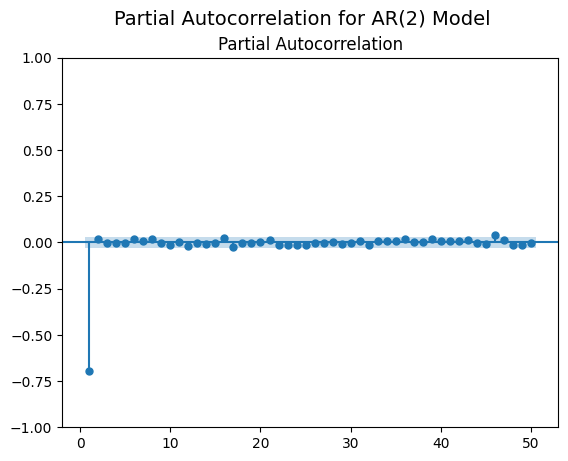

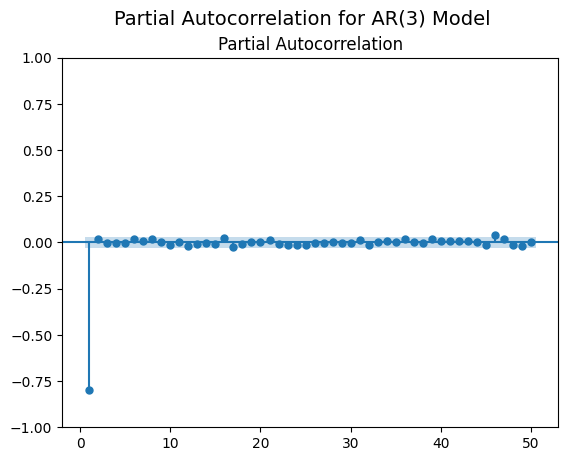

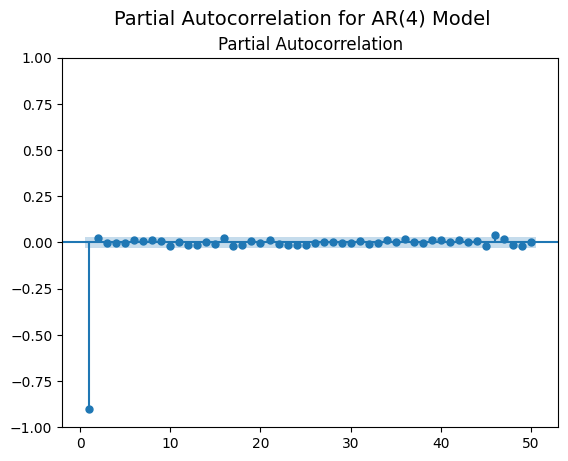

In [9]:
fig_pacf_2 = plot_pacf(ar_model_2, lags=50, zero=False)
fig_pacf_2.suptitle('Partial Autocorrelation for AR(2) Model', fontsize=14)

fig_pacf_3 = plot_pacf(ar_model_3, lags=50, zero=False)
fig_pacf_3.suptitle('Partial Autocorrelation for AR(3) Model', fontsize=14)

fig_pacf_4 = plot_pacf(ar_model_4, lags=50, zero=False)
fig_pacf_4.suptitle('Partial Autocorrelation for AR(4) Model', fontsize=14)

In partial autocorrelation the most important is the first spike is greater with smaller phi value. In next model set I will check what does greater positive value do to the first spike.  
Most of values are inside confidence interval. For certainty I will perform **ADFuller test** on those models.

In [10]:
result = adfuller(ar_model_2)
print(f'ADF Statistic for AR(2): {result[0]}')
print(f'p-value for AR(2): {result[1]}')
result = adfuller(ar_model_3)
print(f'ADF Statistic for AR(3): {result[0]}')
print(f'p-value for AR(3): {result[1]}')
result = adfuller(ar_model_4)
print(f'ADF Statistic for AR(4): {result[0]}')
print(f'p-value for AR(4): {result[1]}')

ADF Statistic for AR(2): -164.78535687401703
p-value for AR(2): 0.0
ADF Statistic for AR(3): -64.93675881723249
p-value for AR(3): 0.0
ADF Statistic for AR(4): -66.70509273258439
p-value for AR(4): 0.0


As expected all sets of data can be considered stationary.

### AR(5) model, what happens when phi>1?

As mentioned in instruction of the exercise I check the behaviour of the model when phi is chosen to be positive value above 1.0 . 



In [11]:
ar_model_5 = generate_ar_model(18,[1.1], random_values_5k, 100)

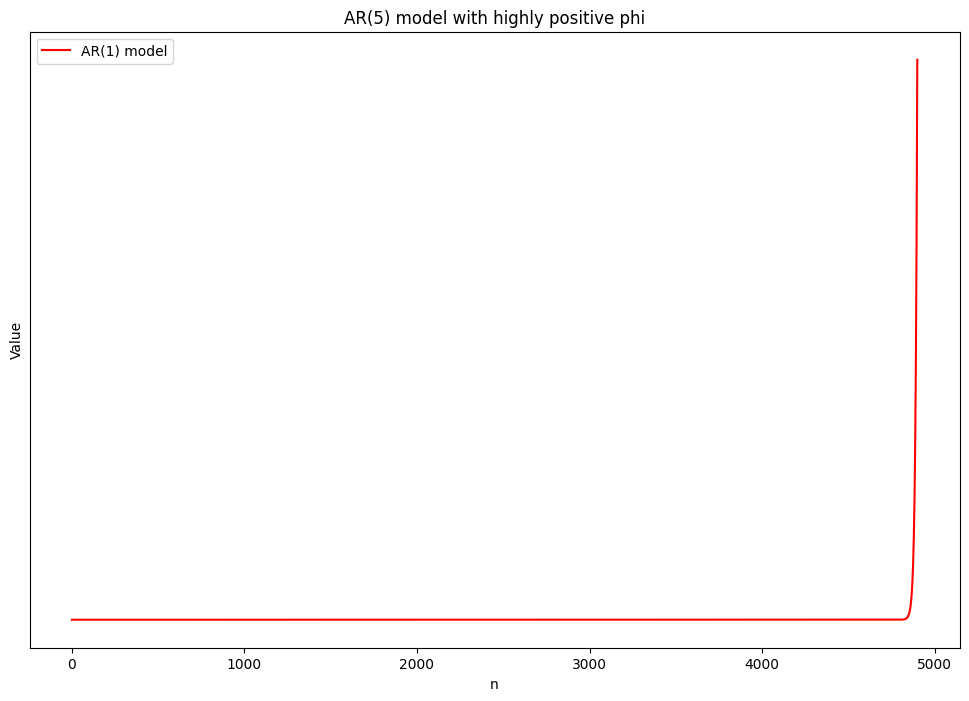

In [12]:
plt.figure(figsize=(12,8))
plt.plot(ar_model_5, color='red', label='AR(1) model')
plt.title('AR(5) model with highly positive phi')
plt.xlabel('n')
plt.ylabel('Value')
plt.yticks([])
plt.legend()
plt.show()

Time series with phi greater than 1.0 became explosive and grew without bound exponentially. To investigate the properties of this model I will perform **autocorrelation** and **partial autocorrelation** analysis.

In [13]:
result = adfuller(ar_model_5)
print(f'ADF Statistic for AR(5): {result[0]}')
print(f'p-value for AR(5): {result[1]}')

ADF Statistic for AR(5): nan
p-value for AR(5): nan


C:\Users\Domin\PycharmProjects\time_series_lab_5\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:954: RuntimeWarning: overflow encountered in square
  ssr = np.sum(resid**2)
C:\Users\Domin\PycharmProjects\time_series_lab_5\.venv\Lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Because of exponential rise in values in that model I'm encountering overflow of calculations.

### AR(6) model, comparison with AR(1) model

**NOTE!** In instruction this model was called "AR(2)", because this name is already occupied my model will be called "AR(6)".

In [14]:
ar_model_6 = generate_ar_model(8, [1.3, -0.7], random_values_5k, 100)

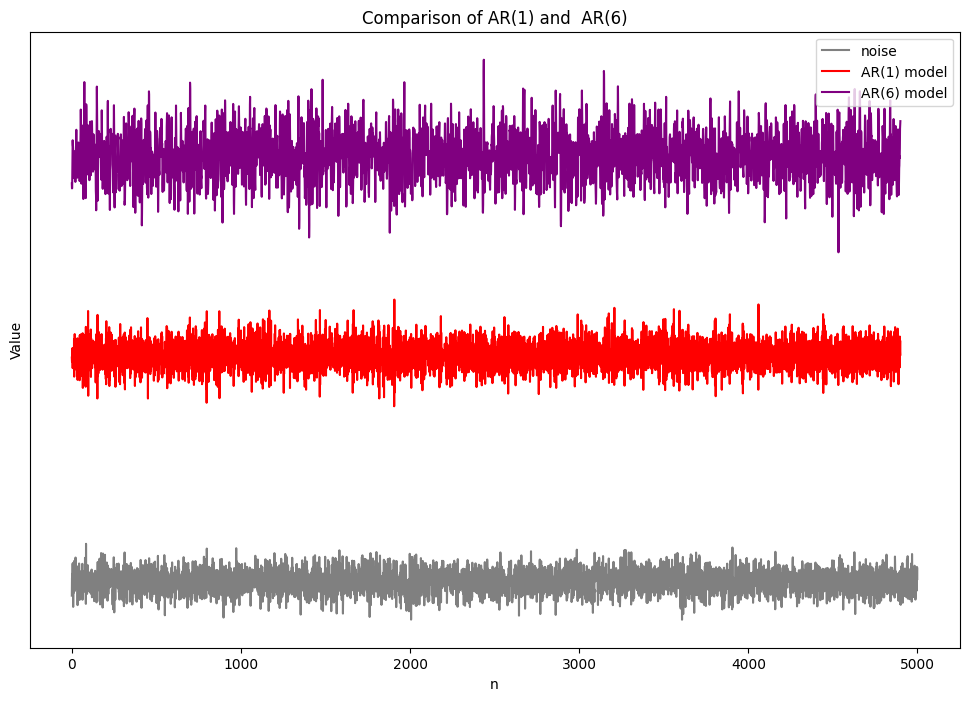

In [15]:
offset = 10  # Define an offset value

plt.figure(figsize=(12,8))
plt.plot(random_values_5k, color='gray', label='noise')
plt.plot([i + offset for i in ar_model_1], color='red', label='AR(1) model')
plt.plot([i + 2*offset for i in ar_model_6], color='purple', label='AR(6) model')
plt.title('Comparison of AR(1) and  AR(6)')
plt.xlabel('n')
plt.ylabel('Value')
plt.yticks([])
plt.legend()
plt.show()

Also in this case we can see greater amplification. Now i will compare **autocorrelation** and **partial autocorrelation** of the series.

Text(0.5, 0.98, 'Autocorrelation for AR(6) Model')

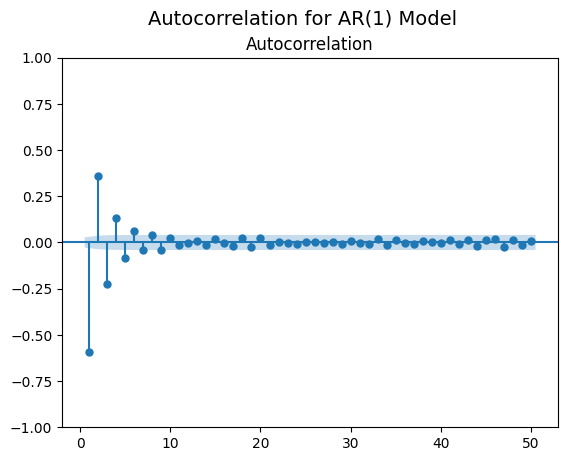

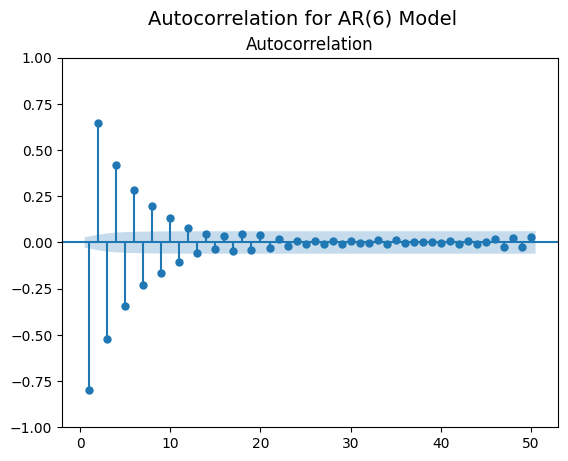

In [16]:
fig_acf_1 = plot_acf(ar_model_1, lags=50, zero=False)
fig_acf_1.suptitle('Autocorrelation for AR(1) Model', fontsize=14)

fig_acf_6 = plot_acf(ar_model_3, lags=50, zero=False)
fig_acf_6.suptitle('Autocorrelation for AR(6) Model', fontsize=14)

Looking at the plots I can assume that AR(1) model seems to be influenced primarily by the immediate previous observation, while the AR(6) model is influenced by a larger number of previous observations. This difference is likely due to the different phi values used in the two models.

Text(0.5, 0.98, 'Partial Autocorrelation for AR(6) Model')

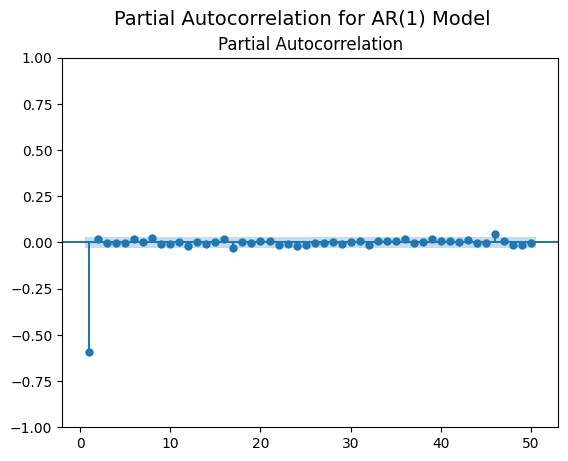

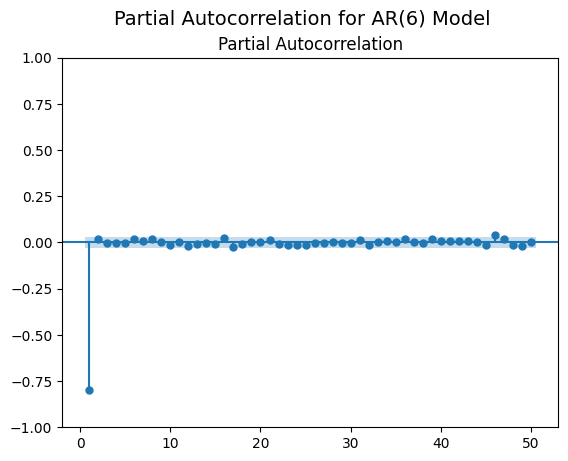

In [17]:
fig_pacf_1 = plot_pacf(ar_model_1, lags=50, zero=False)
fig_pacf_1.suptitle('Partial Autocorrelation for AR(1) Model', fontsize=14)

fig_pacf_6 = plot_pacf(ar_model_3, lags=50, zero=False)
fig_pacf_6.suptitle('Partial Autocorrelation for AR(6) Model', fontsize=14)

Number of significant spikes suggest in both cases the good fit of models. There is not much difference in partial correlation.

# MA MODELS

### MA(1) model


In [18]:
def generate_ma_model(c, theta_values, epsilon_values, burnin):
    ma_values = []

    for t in range(len(epsilon_values)):
        sum_theta_epsilon = 0

        for q in range(len(theta_values)):
            if t - q - 1 >= 0:
                sum_theta_epsilon += theta_values[q] * epsilon_values[t-q]
                

        ma_value = c + epsilon_values[t] + sum_theta_epsilon

        if t >= burnin:
            ma_values.append(ma_value)

    return ma_values

Now I will generate my MA model based on the same dataset as previous AR(p) models.

In [19]:
ma_model_1 = generate_ma_model(c=20,theta_values=[0.8],epsilon_values=random_values_5k,burnin=100)

Now I will present my new MA(1) model on graph in comparison with raw dataset and AR(1) model.

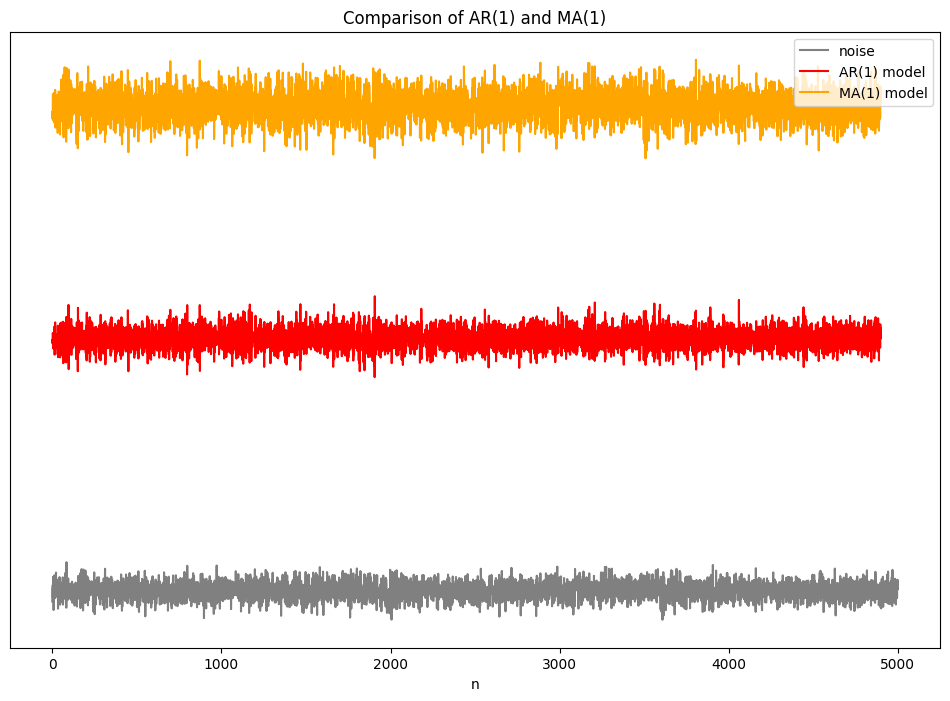

In [20]:
offset = 20  # Define an offset value

plt.figure(figsize=(12,8))
plt.plot(random_values_5k, color='gray', label='noise')
plt.plot([i + offset for i in ar_model_1], color='red', label='AR(1) model')
plt.plot([i + 2*offset for i in ma_model_1], color='orange', label='MA(1) model')
plt.title('Comparison of AR(1) and MA(1)')
plt.xlabel('n')
plt.yticks([])
plt.legend()
plt.show()

Now I will analyse autocorrelation and partial autocorrelation of that model.

Text(0.5, 0.98, 'Autocorrelation for AM(1) Model')

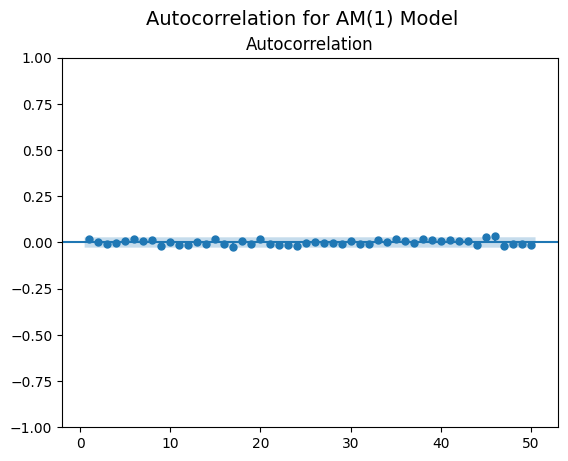

In [21]:
fig_acf_ma_1 = plot_acf(ma_model_1, lags=50, zero=False)
fig_acf_ma_1.suptitle('Autocorrelation for AM(1) Model', fontsize=14)

There are no spikes outside the confidence interval, that leads me to conclusion that the MA(1) model does not have significant autocorrelations at lags beyond 1. This is consistent with the properties of an MA(1) model, where each value is a function of the current noise and the noise one period ago. I will move to **partial autocorrelation**

Text(0.5, 0.98, 'Partial Autocorrelation for AM(1) Model')

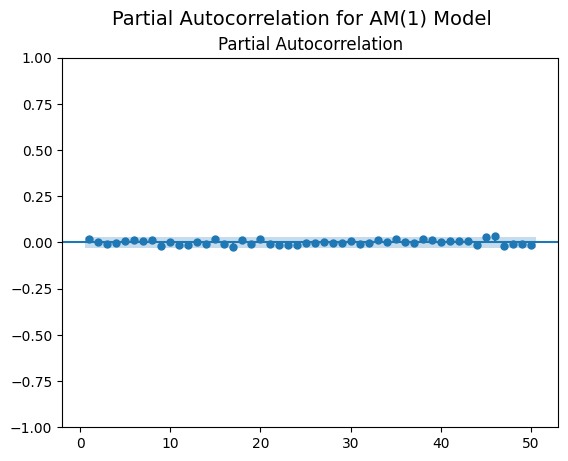

In [22]:
fig_pacf_ma_1 = plot_pacf(ma_model_1, lags=50, zero=False)
fig_pacf_ma_1.suptitle('Partial Autocorrelation for AM(1) Model', fontsize=14)

Similarily to autocorrelation graph any lags greater than 1 show no significant spikes from confidence interval. **Now I will repeat my analysis for MA(2) model.**

### MA(2) model

In [23]:
ma_model_2 = generate_ma_model(0,[-1, 0.8], random_values_5k, 100)


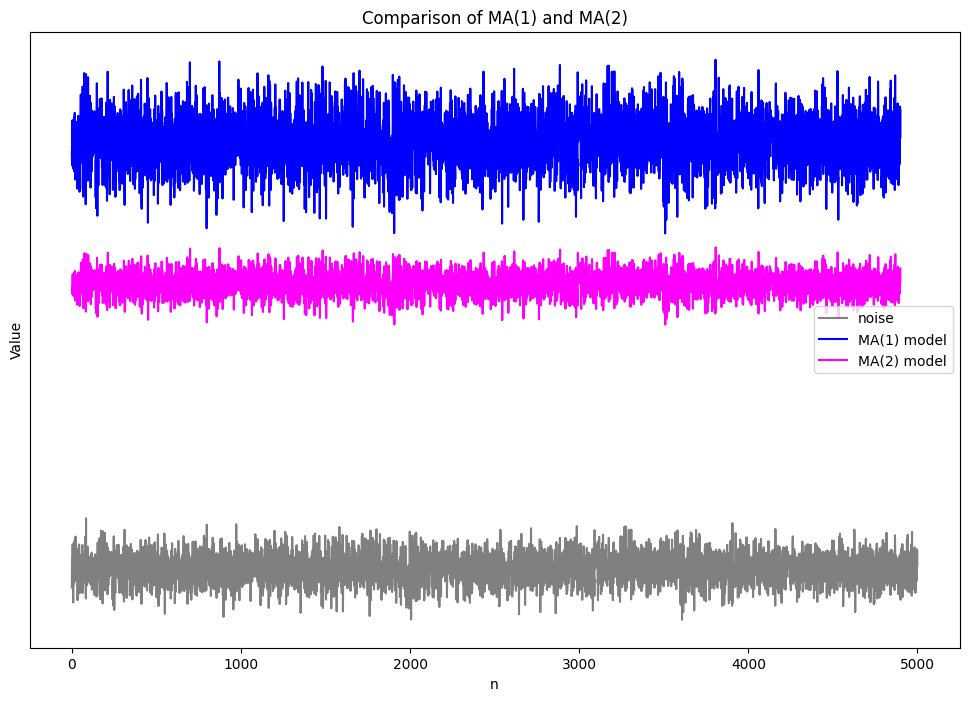

In [24]:
offset = 10  # Define an offset value

plt.figure(figsize=(12,8))
plt.plot(random_values_5k, color='gray', label='noise')
plt.plot([i + offset for i in ma_model_1], color='blue', label='MA(1) model')
plt.plot([i + 2*offset for i in ma_model_2], color='magenta', label='MA(2) model')
plt.title('Comparison of MA(1) and MA(2)')
plt.xlabel('n')
plt.ylabel('Value')
plt.yticks([])
plt.legend()
plt.show()

Now I will analyse **autocorrelation and partial autocorrelation** plots for that model.

Text(0.5, 0.98, 'Partial Autocorrelation for AM(2) Model')

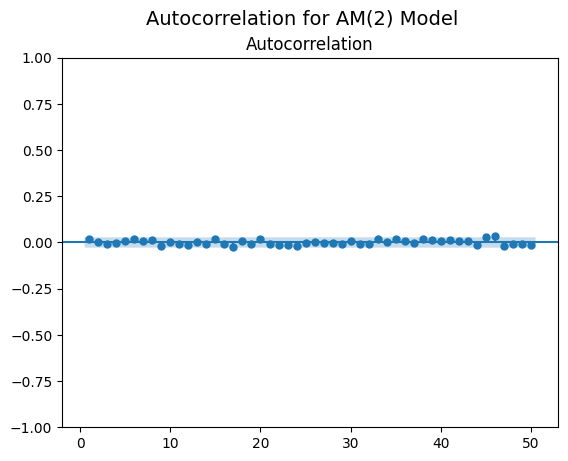

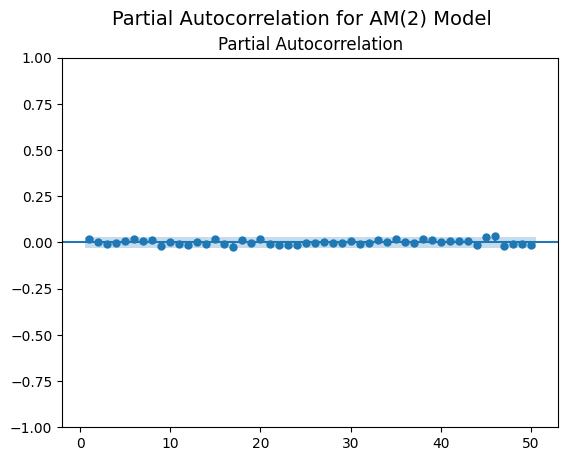

In [25]:
fig_acf_1 = plot_acf(ma_model_2, lags=50, zero=False)
fig_acf_1.suptitle('Autocorrelation for AM(2) Model', fontsize=14)
fig_pacf_1 = plot_pacf(ma_model_2, lags=50, zero=False)
fig_pacf_1.suptitle('Partial Autocorrelation for AM(2) Model', fontsize=14)

Similarily to MA(1) autocorrelation and partial autocorrelation show no significant outliers out of confidence interval

### Comparison of ACF and PACFs graphs for AR(1) and MA(1) 

I will first compare autocorrelation of both models.

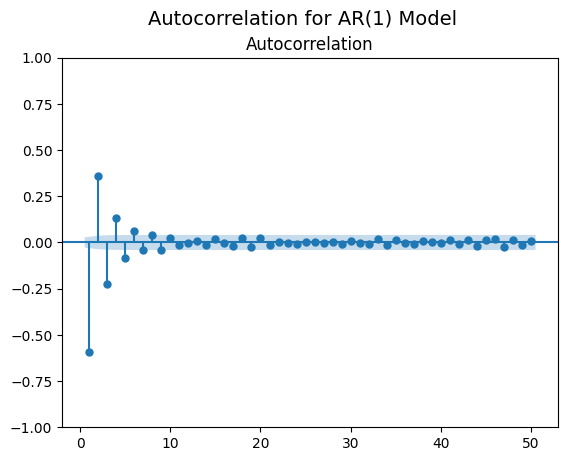

In [26]:
fig_acf_ar_1

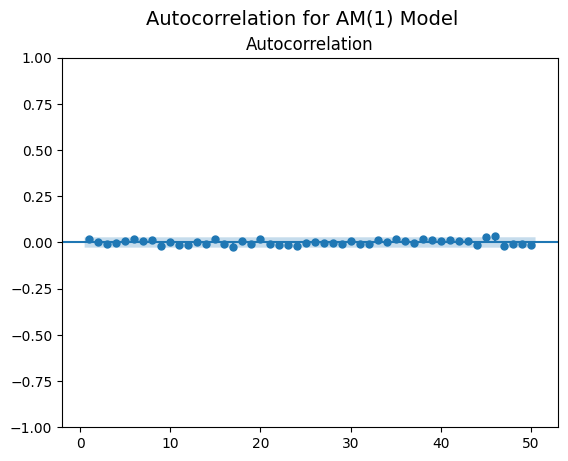

In [27]:
fig_acf_ma_1

Main difference in autocorrelation plots between AR(1) and MA(1) models is spikes in autocorrelation till 5th lag that exceed confidence interval in AR(1). That does not happen in case of MA(1) model. In Autoregresive models there is a strong dependency on lagged values that spikes in lag=1 and decreases slowly. In Moving average models this does not occur and only the first lag is significant. Because of noise influence on model result. These plots show those differences. Now I will move to **partial autocorrelation**

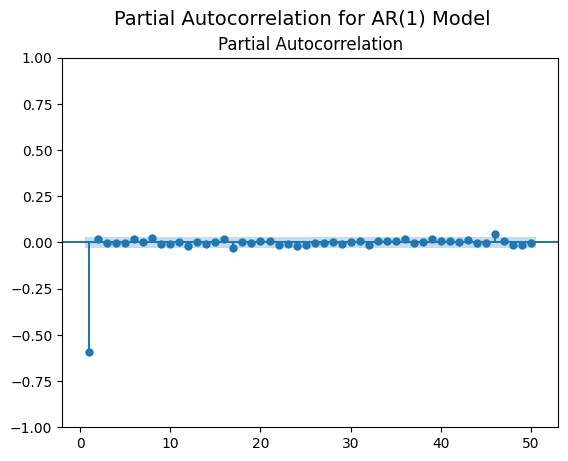

In [28]:
fig_pacf_ar_1

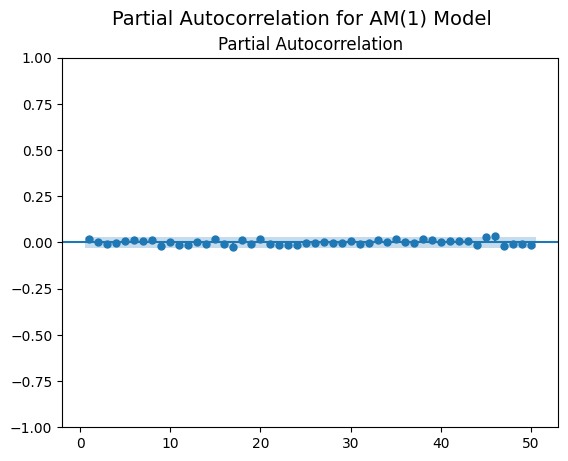

In [29]:
fig_pacf_ma_1#MA

Sole difference between two models is negative spike in partial autocorrelation on the first lag in AR(1) model. This is expected only in auto regression and not in moving average model.

# Summary

After that analysis I can deduct a concise conclusion.
AR models assume that the current observation is a linear combination of past observations, while MA models assume that the current observation is a linear combination of past error terms. This can be seen in autocorrelation plots of these models. AR models show a gradually decreasing autocorrelation over time, while MA models show a sharp cut-off in autocorrelation after a certain number of lags. 

In this part of exrecise I was meant to apply ARIMA model to my AR and MA models of type p = [1,2,3,4]

### ARIMA Model Fitting for AR Models
I am fitting ARIMA models of order p (where p ranges from 1 to 4) to each of AR models. The ARIMA model is a generalization of an AR model and can be used to understand and forecast future points in the time series.


In [30]:
from statsmodels.tsa.arima.model import ARIMA

best_aic = np.inf
best_bic = np.inf
best_order_aic = None
best_order_bic = None
list_of_armia_ar = []

for p in range(1, 5):
    model = ARIMA(list_of_ar_models[p-1], order=(p, 0, 0))  
    model_fit = model.fit()
    list_of_armia_ar.append(model)

    # Compare AIC and BIC
    if model_fit.aic < best_aic:
        best_aic = model_fit.aic
        best_order_aic = (p, 0, 0)
    if model_fit.bic < best_bic:
        best_bic = model_fit.bic
        best_order_bic = (p, 0, 0)

print(f"Best Model based on AIC: AR{best_order_aic[0]} with AIC = {best_aic}")
print(f"Best Model based on BIC: AR{best_order_bic[0]} with BIC = {best_bic}")

IndexError: list index out of range

In plot I will compare possible overlap of AR and ARIMA.


In [ ]:
import matplotlib.pyplot as plt

ar_model = list_of_ar_models[1]

best_arima_model = ARIMA(ar_model, order=best_order_aic)  
best_arima_model_fit = best_arima_model.fit()

plt.figure(figsize=(12, 8))

plt.plot(ar_model, color='blue', label='AR Model')
plt.plot(best_arima_model_fit.fittedvalues, color='orange', label='Best ARIMA Model')

plt.title('Comparison of AR and Best Fitting ARIMA Models')
plt.xlabel('Time')
plt.ylabel('Value')

plt.legend()

plt.show()

### AIC and BIC Comparison for MAR Models
After fitting the ARIMA models, I compare them based on their AIC and BIC values. AIC and BIC are both measures of the goodness of fit of the model, but they also take into account the complexity of the model (i.e., the number of parameters used). The model with the lowest AIC or BIC is typically considered the best.


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Loop over the MA models
for i, ma_model in enumerate(list_of_ma_models):
    best_aic = np.inf
    best_bic = np.inf
    best_order_aic = None
    best_order_bic = None

    # Loop over the orders
    for p in range(1, 5):
        # Create and fit the ARIMA model
        model = ARIMA(ma_model, order=(p, 0, 0))
        model_fit = model.fit()

        # Print the summary
        print(f"AR({p}) Model Summary for MA Model {i+1}:")
        print(model_fit.summary())

        # Compare AIC and BIC
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_order_aic = (p, 0, 0)
        if model_fit.bic < best_bic:
            best_bic = model_fit.bic
            best_order_bic = (p, 0, 0)

    print(f"Best Model for MA Model {i+1} based on AIC: AR{best_order_aic[0]} with AIC = {best_aic}")
    print(f"Best Model for MA Model {i+1} based on BIC: AR{best_order_bic[0]} with BIC = {best_bic}")

### ARIMA Model Fitting for MA Models
Similar to the AR models, we are also fitting ARIMA models of order p (where p ranges from 1 to 4) to each of our MA models.
The ARIMA model can also be used to understand and forecast future points in the MA time series.
 AIC and BIC Comparison for MA Models
After fitting the ARIMA models to the MA models, we again compare them based on their AIC and BIC values.
The model with the lowest AIC or BIC is typically considered the best.

Based on the provided results I might assume that ARIMA model was best fitted for AR 1 and MA 1 models.